# Flipkart Reviews

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.flipkart.com/srpm-wayfarer-sunglasses/product-reviews/itmaf19ae5820c06?pid=SGLFHQPHY2GZ4HFP&lid=LSTSGLFHQPHY2GZ4HFP0AZWKY&marketplace=FLIPKART'
resp = requests.get(url)
print(resp.status_code)

soup = BeautifulSoup(resp.text,"html.parser")

200


In [3]:
reviews = soup.findAll("div", attrs={"class","_6K-7Co"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [4]:
reviews

['Best in  this paPrice range',
 'Awesome product👍👍',
 'Good products',
 'Very nice 👌👌👌',
 'this is very comfortable and portable. And good quality.',
 'Nice',
 'Looking beautiful and good quality',
 'Most expensive quality for the google 👌👌😘',
 'Awesome 👌 3pcs',
 'Love it']

In [5]:
type(reviews)

bs4.element.ResultSet

In [6]:
flipkart_review = []
for i in range(2,120):
    url = 'https://www.flipkart.com/srpm-wayfarer-sunglasses/product-reviews/itmaf19ae5820c06?pid=SGLFHQPHY2GZ4HFP&lid=LSTSGLFHQPHY2GZ4HFP0AZWKY&marketplace=FLIPKART&page='
    url = url+str(i)
    resp = requests.get(url)
#     print(resp.status_code)

    soup = BeautifulSoup(resp.text,"html.parser")
    
    reviews = soup.findAll("div", attrs={"class","_6K-7Co"})
    for i in range(len(reviews)):
        reviews[i] = reviews[i].text
    reviews = list(reviews)
    for rev in reviews:
        flipkart_review.append(rev)

In [7]:
flipkart_review

['Not Bad',
 'Awesome product I like it very much',
 'Trust me.. Product is super cool.. Quality is  like brand...',
 'Nice',
 'Awesome',
 'Very good Product',
 'According to price its good.  But i will recommend  to increase your budget and have a good item',
 "Amazing sunglasses just go for itDon't see the price....",
 'Nice',
 'Thanks flipkart',
 'Besttttt',
 'Very nice product',
 'Nice',
 'Nice combo at min. price for temporary use as material used is of low quality. But good item at reasonable price.',
 'Wow',
 'Nice',
 'Good product 👌👌👌👌',
 'Very Nice product',
 'nice product',
 'Mind-blowing 😎',
 'Worst',
 'NiceGood',
 'okay',
 'Good Product.... But size so big',
 '👌👌Super👌👌👌👌 good product',
 "Awesome. It's value for money.",
 'Good prod',
 'Absolutely amazing at his price point',
 'Perfect',
 'Vary bad, worst packing ever , there is no cotton with it for cleaning or any kind of box . Vary bad',
 'Ok nise',
 'Nice',
 'Qwality in ok....not a best',
 'Best product',
 'very nice pr

In [8]:
type(flipkart_review)

list

In [9]:
len(flipkart_review)

1153

## Sentiment Analysis

In [10]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.DataFrame(flipkart_review, columns = ['Flipkart_reviews'])
data.head()

,Flipkart_reviews
0,Not Bad
1,Awesome product I like it very much
2,Trust me.. Product is super cool.. Quality is ...
3,Nice
4,Awesome


## EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flipkart_reviews  1153 non-null   object
dtypes: object(1)
memory usage: 9.1+ KB


In [13]:
data.shape

(1153, 1)

In [14]:
flipkart_review

['Not Bad',
 'Awesome product I like it very much',
 'Trust me.. Product is super cool.. Quality is  like brand...',
 'Nice',
 'Awesome',
 'Very good Product',
 'According to price its good.  But i will recommend  to increase your budget and have a good item',
 "Amazing sunglasses just go for itDon't see the price....",
 'Nice',
 'Thanks flipkart',
 'Besttttt',
 'Very nice product',
 'Nice',
 'Nice combo at min. price for temporary use as material used is of low quality. But good item at reasonable price.',
 'Wow',
 'Nice',
 'Good product 👌👌👌👌',
 'Very Nice product',
 'nice product',
 'Mind-blowing 😎',
 'Worst',
 'NiceGood',
 'okay',
 'Good Product.... But size so big',
 '👌👌Super👌👌👌👌 good product',
 "Awesome. It's value for money.",
 'Good prod',
 'Absolutely amazing at his price point',
 'Perfect',
 'Vary bad, worst packing ever , there is no cotton with it for cleaning or any kind of box . Vary bad',
 'Ok nise',
 'Nice',
 'Qwality in ok....not a best',
 'Best product',
 'very nice pr

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
#Using spacy for Tokenizing our dataset
doc_sen = []
for sen in flipkart_review:
    doc = nlp(sen)
    doc_sen.append(doc)

In [17]:
#Tokenized Sentences
doc_sen

[Not Bad,
 Awesome product I like it very much,
 Trust me.. Product is super cool.. Quality is  like brand...,
 Nice,
 Awesome,
 Very good Product,
 According to price its good.  But i will recommend  to increase your budget and have a good item,
 Amazing sunglasses just go for itDon't see the price....,
 Nice,
 Thanks flipkart,
 Besttttt,
 Very nice product,
 Nice,
 Nice combo at min. price for temporary use as material used is of low quality. But good item at reasonable price.,
 Wow,
 Nice,
 Good product 👌👌👌👌,
 Very Nice product,
 nice product,
 Mind-blowing 😎,
 Worst,
 NiceGood,
 okay,
 Good Product.... But size so big,
 👌👌Super👌👌👌👌 good product,
 Awesome. It's value for money.,
 Good prod,
 Absolutely amazing at his price point,
 Perfect,
 Vary bad, worst packing ever , there is no cotton with it for cleaning or any kind of box . Vary bad,
 Ok nise,
 Nice,
 Qwality in ok....not a best,
 Best product,
 very nice product must buy,
 Super,
 It was nice quality also fine......,
 So goo

In [18]:
#Removing unwanted symbole incase if exist
ip_rev_string = []
for string in flipkart_review:
    string = re.sub("[^A-Za-z]+"," ",string = string).lower()
    ip_rev_string.append(string)

ip_rev_string

['not bad',
 'awesome product i like it very much',
 'trust me product is super cool quality is like brand ',
 'nice',
 'awesome',
 'very good product',
 'according to price its good but i will recommend to increase your budget and have a good item',
 'amazing sunglasses just go for itdon t see the price ',
 'nice',
 'thanks flipkart',
 'besttttt',
 'very nice product',
 'nice',
 'nice combo at min price for temporary use as material used is of low quality but good item at reasonable price ',
 'wow',
 'nice',
 'good product ',
 'very nice product',
 'nice product',
 'mind blowing ',
 'worst',
 'nicegood',
 'okay',
 'good product but size so big',
 ' super good product',
 'awesome it s value for money ',
 'good prod',
 'absolutely amazing at his price point',
 'perfect',
 'vary bad worst packing ever there is no cotton with it for cleaning or any kind of box vary bad',
 'ok nise',
 'nice',
 'qwality in ok not a best',
 'best product',
 'very nice product must buy',
 'super',
 'it was ni

## Sentiment Analysis using NLTK

In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
def get_vader_sentiment(review): 

    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [21]:
sentiment = []
for review in ip_rev_string:
    sent = get_vader_sentiment(review)
    sentiment.append(sent)
    
sentiment

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'po

In [22]:
final_data = data.copy()
final_data['sentiment_nltk'] = sentiment
final_data.head()

,Flipkart_reviews,sentiment_nltk
0,Not Bad,positive
1,Awesome product I like it very much,positive
2,Trust me.. Product is super cool.. Quality is ...,positive
3,Nice,positive
4,Awesome,positive


## Sentiment Analysis using TextBlob

In [23]:
from textblob import TextBlob 

In [24]:
def get_sentiment(review): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [25]:
sentiment = []
for review in ip_rev_string:
    sent = get_sentiment(review)
    sentiment.append(sent)
    
sentiment

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'p

In [26]:
final_data['sentiment_textblob'] = sentiment
final_data

,Flipkart_reviews,sentiment_nltk,sentiment_textblob
0,Not Bad,positive,positive
1,Awesome product I like it very much,positive,positive
2,Trust me.. Product is super cool.. Quality is ...,positive,positive
3,Nice,positive,positive
4,Awesome,positive,positive
...,...,...,...
1148,Poor product,negative,negative
1149,Sooper 👌,neutral,neutral
1150,Osm,neutral,neutral
1151,A one quality,neutral,neutral


In [27]:
val_nltk = final_data['sentiment_nltk'].value_counts()
val_nltk

positive    932
negative    141
neutral      80
Name: sentiment_nltk, dtype: int64

In [28]:
val_text = final_data['sentiment_textblob'].value_counts()
val_text

positive    941
negative    122
neutral      90
Name: sentiment_textblob, dtype: int64

In [29]:
val_text.index

Index(['positive', 'negative', 'neutral'], dtype='object')

In [30]:
dt = {'sentiment':val_text.index,'sentiment_nltk':val_nltk.values,'sentiment_textblob':val_text.values}
sentiment_df = pd.DataFrame(dt )
sentiment_df

,sentiment,sentiment_nltk,sentiment_textblob
0,positive,932,941
1,negative,141,122
2,neutral,80,90


<Figure size 1440x720 with 0 Axes>

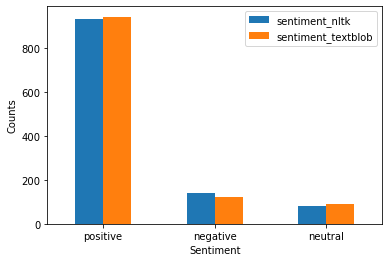

In [31]:
plt.figure(figsize = (20,10))
sentiment_df.plot.bar(x = 'sentiment', y = ['sentiment_nltk', 'sentiment_textblob'], rot = 0)
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()